## Importing Liberaries

In [1]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import cv2
warnings.filterwarnings('ignore')

from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.utils import to_categorical

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline

2023-01-19 19:38:23.919134: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-19 19:38:24.166023: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/piyush/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-01-19 19:38:24.166054: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-19 19:38:24.208198: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already 

## Setting Folder Paths

In [2]:
my_data_dir = '../data'
Train_path = my_data_dir+'/APOD_Train/'
Valid_path = my_data_dir+'/APOD_Valid/'

## Generating Image Data

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    Train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')
val_generator = val_datagen.flow_from_directory(
    Valid_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 7000 images belonging to 2 classes.
Found 2183 images belonging to 2 classes.


## Model Building

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

2023-01-19 19:38:26.648178: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/piyush/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-01-19 19:38:26.648217: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-19 19:38:26.648244: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (piyushLap): /proc/driver/nvidia/version does not exist
2023-01-19 19:38:26.648567: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Model Compilation and Training

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=30,
    validation_data=val_generator,
    validation_steps=50)

Epoch 1/30
50/50 [==============================] - 25s 470ms/step - loss: 0.5506 - accuracy: 0.7092 - val_loss: 0.5889 - val_accuracy: 0.6344
Epoch 2/30
50/50 [==============================] - 23s 461ms/step - loss: 0.4544 - accuracy: 0.7556 - val_loss: 0.4484 - val_accuracy: 0.7550
Epoch 3/30
50/50 [==============================] - 23s 468ms/step - loss: 0.4426 - accuracy: 0.7764 - val_loss: 0.4342 - val_accuracy: 0.8438
Epoch 4/30
50/50 [==============================] - 24s 473ms/step - loss: 0.3920 - accuracy: 0.8169 - val_loss: 0.6171 - val_accuracy: 0.7387
Epoch 5/30
50/50 [==============================] - 23s 467ms/step - loss: 0.3951 - accuracy: 0.8219 - val_loss: 0.3732 - val_accuracy: 0.8494
Epoch 6/30
50/50 [==============================] - 23s 468ms/step - loss: 0.3347 - accuracy: 0.8506 - val_loss: 0.3681 - val_accuracy: 0.8569
Epoch 7/30
50/50 [==============================] - 23s 470ms/step - loss: 0.3544 - accuracy: 0.8475 - val_loss: 0.4238 - val_accuracy: 0.8556

## Model Summary

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

## Saving the model for further usage

In [8]:
!mkdir saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets


## Evaluating the models performance

In [9]:
test_loss, test_acc = model.evaluate_generator(train_generator, steps=50)
print('Train acc:', test_acc)

Train acc: 0.9143750071525574


In [10]:
test_loss, test_acc = model.evaluate_generator(val_generator, steps=50)
print('Validation acc:', test_acc)

Validation acc: 0.8575000166893005


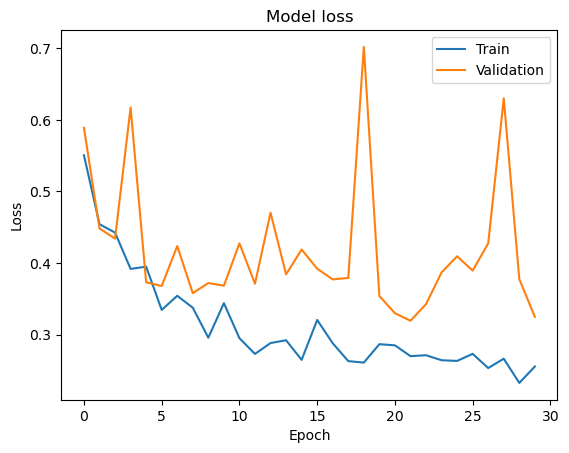

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

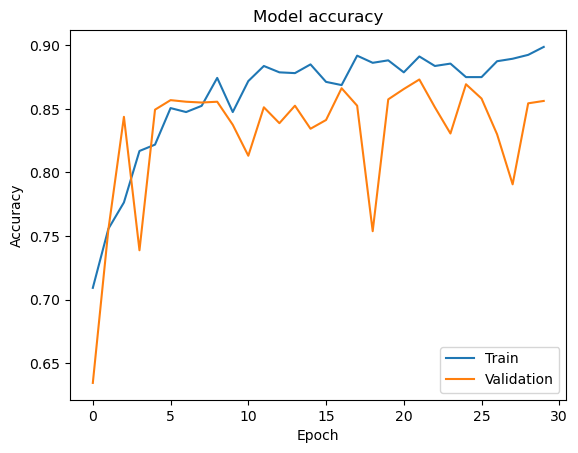

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

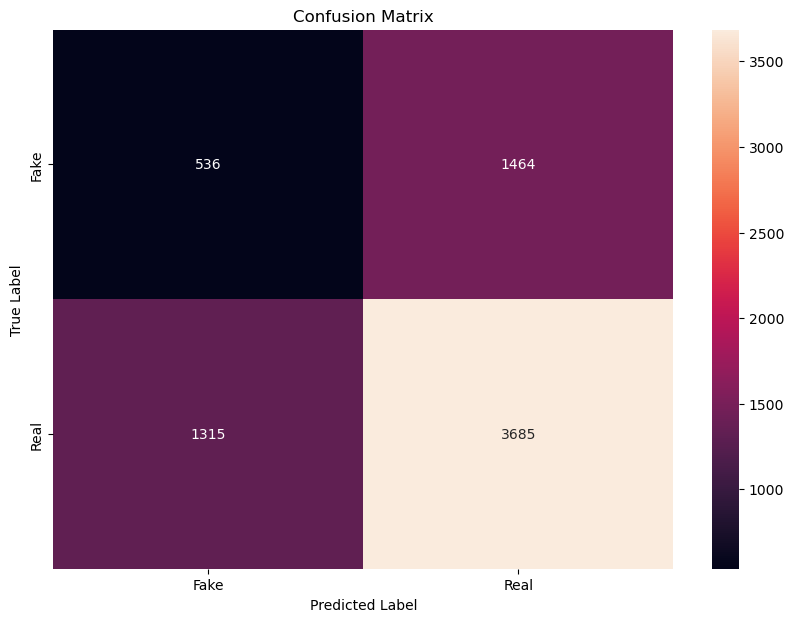

In [13]:
test_generator = train_generator
test_generator.reset()
predictions = model.predict_generator(test_generator)

predicted_classes = np.round(predictions)
predicted_classes = predicted_classes.flatten()

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  

confusion_mtx = confusion_matrix(true_classes, predicted_classes)

df_cm = pd.DataFrame(confusion_mtx, index = class_labels, columns = class_labels)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [14]:
print(classification_report(true_classes, predicted_classes))

              precision    recall  f1-score   support

           0       0.29      0.27      0.28      2000
           1       0.72      0.74      0.73      5000

    accuracy                           0.60      7000
   macro avg       0.50      0.50      0.50      7000
weighted avg       0.59      0.60      0.60      7000



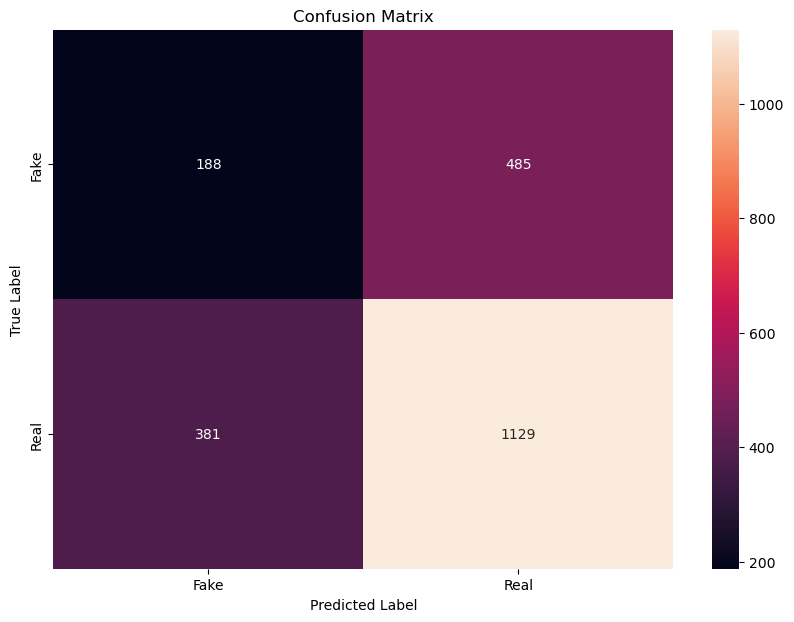

In [15]:
test_generator = val_generator
test_generator.reset()
predictions = model.predict_generator(test_generator)

predicted_classes = np.round(predictions)
predicted_classes = predicted_classes.flatten()

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  

confusion_mtx = confusion_matrix(true_classes, predicted_classes)

df_cm = pd.DataFrame(confusion_mtx, index = class_labels, columns = class_labels)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [16]:
print(classification_report(true_classes, predicted_classes))

              precision    recall  f1-score   support

           0       0.33      0.28      0.30       673
           1       0.70      0.75      0.72      1510

    accuracy                           0.60      2183
   macro avg       0.51      0.51      0.51      2183
weighted avg       0.59      0.60      0.59      2183

